## Lista de Exercícios da Disciplina de Métodos Computacios em Engenharia – Primeira Unidade

### Hudson Artur de Lima Andrade – Engenharia Elétrica

1. (Valor: 1.5 pontos) - Ajuste os valores da tabela a uma equação do tipo y = ax^b. 
Saída do programa: Valores de a, b, e diagrama de dispersão com a curva de ajuste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x   =    np.array([1.0,   2.0,  3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

y   =    np.array([100.0, 25.0, 11.1, 6.3, 4.0, 2.8, 2.0, 1.6, 1.2, 1.0])

n   =    10

ln_x = np.log(x)
ln_y = np.log(y)

In [3]:
def descobreB1(n, x, y):
    b1 = ((n * np.sum(x*y)) - (np.sum(x) * np.sum(y))) / (n * np.sum(x*x) - (np.sum(x) * np.sum(x)))
    
    return b1

In [4]:
def descobreB0(n, x, y, b1):
    b0 = (np.sum(y) - (np.sum(x) * b1)) / n
    
    return b0

In [5]:
def erroRelativo(valor_exato, valor_aproximado):
    erroRelativo = np.absolute((valor_exato - valor_aproximado)/valor_exato)
    
    return erroRelativo

<img src="a_&_b_questao_01.jpg">

In [6]:
b1 = descobreB1(n, ln_x, ln_y)

In [7]:
print('Valor de b1:', b1)

Valor de b1: -2.002717752572164


In [8]:
b0 = descobreB0(n, ln_x, ln_y, b1)

In [9]:
print('Valor do ln b0:', b0)

Valor do ln b0: 4.608280209974528


In [10]:
b0 = np.exp(b0)

In [11]:
print('Valor do b0:', b0)

Valor do b0: 100.31148651284232


In [12]:
z = np.polyfit(ln_x, y, 1)
p = np.poly1d(z)

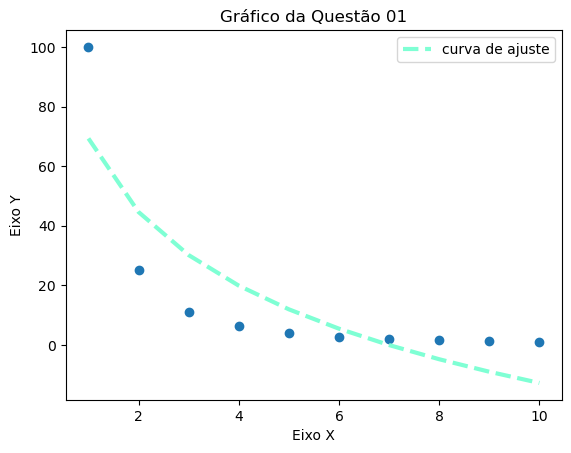

In [13]:
plt.scatter(x, y)
plt.plot(x, p(ln_x), color="aquamarine", linewidth=3, linestyle="--", label="curva de ajuste")
plt.title('Gráfico da Questão 01')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.show()

In [14]:
print('Valor aproximado de a:', b1)
print('Valor aproximado de b:', b0)

Valor aproximado de a: -2.002717752572164
Valor aproximado de b: 100.31148651284232


2. Ajuste o índice de refração, no intervalo [0.5, 1.1], com incrementos em λ iguais a 0.1, pela equação dada. Saída do programa: Valores de a, b, curvas de n(λ) exata e ajustada e valor do erro relativo em λ = 0.98.


In [15]:
a_i  = np.array([0.73454395,  0.42710828, 0.82103399])

li_2 = np.array([0.007564986, 0.01253323, 117.64743])

itens = 7

In [16]:
n = 0
n_quadrado_lamb = []
k = 0.5

while(k <= 1.1):
    n = 0
    for i, j in zip(a_i,li_2):
        n = n + (i*k*k)/((k*k) - j)
    k += 0.1
    n += 1
    n_quadrado_lamb.append(n)
    

In [17]:
n_quadrado_lamb

[2.2053669614894647,
 2.1903050056249933,
 2.1809479462308308,
 2.174478972494324,
 2.1695977435161304,
 2.165633796402613,
 2.162211780422886]

In [18]:
n_lamb = np.sqrt(n_quadrado_lamb)

In [19]:
type(n_lamb)

numpy.ndarray

In [20]:
lista_lambda = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])

In [21]:
print('Valor de n_lamb:', n_lamb)

Valor de n_lamb: [1.4850478  1.47996791 1.47680329 1.47461146 1.47295545 1.47160925
 1.47044612]


In [22]:
ln_n_lambda = np.log(1/n_lamb - 0.5)

In [23]:
ln_n_lambda

array([-1.75227533, -1.73903234, -1.73082475, -1.72515895, -1.72088826,
       -1.71742293, -1.71443337])

In [24]:
b1 = descobreB1(itens, lista_lambda, ln_n_lambda)

In [25]:
b1

0.05952899353171738

In [26]:
b0 = descobreB0(itens, lista_lambda, ln_n_lambda, b1)

In [27]:
b0

-1.7761997559701137

In [28]:
z = np.polyfit(lista_lambda, n_lamb, 1)
p = np.poly1d(z)

In [29]:
n_lambda_98_exato = (1/(0.5 + np.exp(b0 + b1*0.98)))

In [30]:
n_lambda_98_exato

1.4717796865984032

In [31]:
n_lambda_98_aproximado = b0 + b1*0.98

In [32]:
n_lambda_98_aproximado

-1.7178613423090308

In [33]:
valor_aproximado_lambda_98 = (1/(np.exp(n_lambda_98_aproximado)+0.5))

In [34]:
valor_aproximado_lambda_98

1.4717796865984032

In [35]:
n_lambda_erroRelativo = erroRelativo(n_lambda_98_exato, valor_aproximado_lambda_98)

In [36]:
print('Valor de a:', b0)
print('Valor de b:', b1)

Valor de a: -1.7761997559701137
Valor de b: 0.05952899353171738


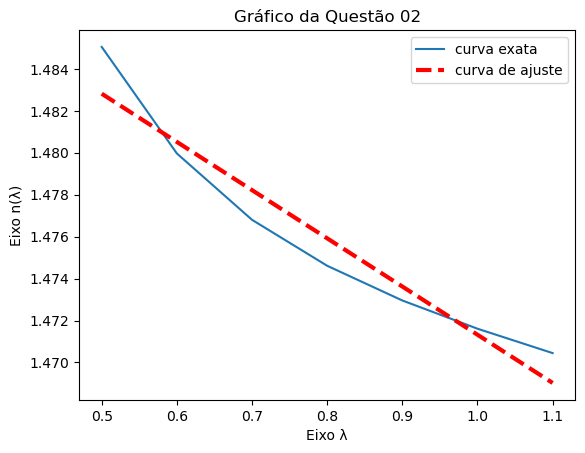

In [37]:
plt.plot(lista_lambda, n_lamb, label="curva exata")
plt.plot(lista_lambda, p(lista_lambda), color="red", linewidth=3, linestyle="--", label="curva de ajuste")
plt.title('Gráfico da Questão 02')
plt.xlabel('Eixo λ')
plt.ylabel('Eixo n(λ)')
plt.legend()
plt.show()

In [38]:
print('Valor do erro relativo em λ=0.98:', n_lambda_erroRelativo)

Valor do erro relativo em λ=0.98: 0.0
